<a href="https://colab.research.google.com/github/StivenVB/Parcial-1-Sistemas-Inteligentes-II/blob/main/Regresi%C3%B3n_log%C3%ADstica_parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Importación de matriz de confusión
from sklearn.metrics import confusion_matrix
#Importación grafica de matriz de confusión
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

In [69]:
from google.colab import files
import io
archivo=files.upload()
dataframe=pd.read_csv(io.BytesIO(archivo['dataset(3).csv']),delimiter=",")

Saving dataset(3).csv to dataset(3).csv


Preprocesamiento de datos

In [70]:
dataframe.replace('?', np.nan, inplace=True)

Codificación valores categóricos

In [72]:
columnas_categoricas = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']

codificador_etiquetas = LabelEncoder()
for col in columnas_categoricas:
    dataframe[col] = codificador_etiquetas.fit_transform(dataframe[col].astype(str))


Eliminar datos faltantes

In [73]:
dataframe = dataframe.dropna()

División de datos

In [74]:
X = dataframe.drop('class', axis=1)
y = dataframe['class']

Partir el dataset para entrenamiento y pruebas (80 % entrenamiento y 20% prueba)

In [94]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=6)
print("XTRain=",XTrain.shape)
print("XTest=",XTest.shape)

XTRain= (162, 24)
XTest= (41, 24)


Entrenamiento del modelo

In [95]:
modelo = LogisticRegression()
modelo.fit(XTrain, yTrain)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predicciones

In [96]:
yPredicho = modelo.predict(XTest)


Matriz de confusión

[[12  2]
 [ 0 27]]


<Axes: >

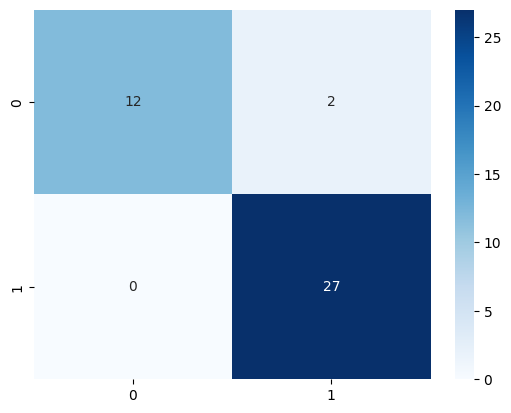

In [98]:
matriz=confusion_matrix(yTest,yPredicho)
print(matriz)
sns.heatmap(matriz,annot=True,cmap="Blues")

Métricas

In [100]:
precision_recall_fscore_support(yTest,yPredicho,average=None)
etiquetas=["ckd","notckd"]
print(classification_report(yTest,yPredicho,target_names=etiquetas))
print("Accuracy=",modelo.score(XTest,yTest))

              precision    recall  f1-score   support

         ckd       1.00      0.86      0.92        14
      notckd       0.93      1.00      0.96        27

    accuracy                           0.95        41
   macro avg       0.97      0.93      0.94        41
weighted avg       0.95      0.95      0.95        41

Accuracy= 0.9512195121951219
